<a href="https://colab.research.google.com/github/sangeetha62/Machine-learning/blob/main/multiple_linear_regression_(real_estate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Real estate.csv")

In [ ]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [ ]:
df1=df.drop(['No','X1 transaction date'],axis=1)


In [ ]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]


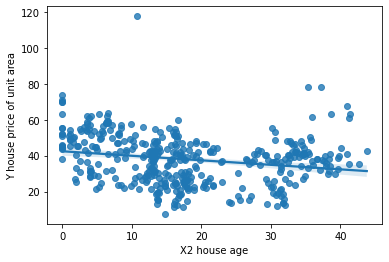

In [ ]:
import seaborn as sns
sns.regplot(x=df1['X2 house age'],y=y)


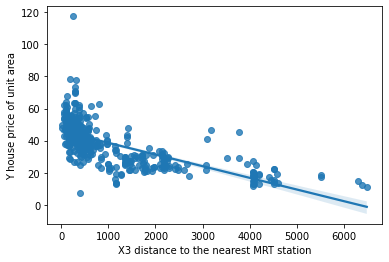

In [ ]:
import seaborn as sns
sns.regplot(x=df1['X3 distance to the nearest MRT station'],y=y)

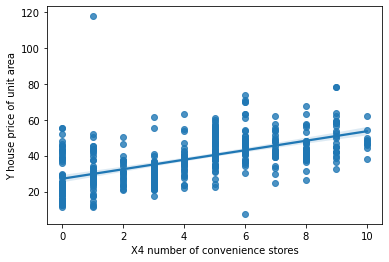

In [ ]:
import seaborn as sns
sns.regplot(x=df1['X4 number of convenience stores'],y=y)

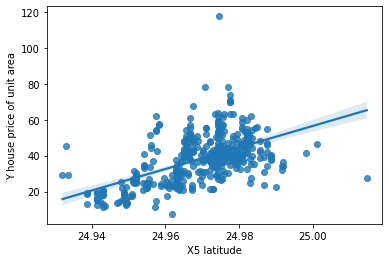

In [ ]:
import seaborn as sns
sns.regplot(x=df1['X5 latitude'],y=y)

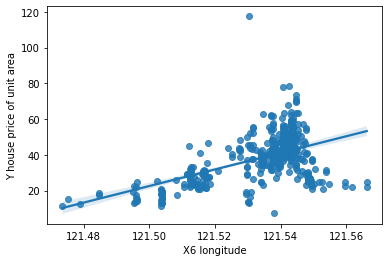

In [ ]:
import seaborn as sns
sns.regplot(x=df1['X6 longitude'],y=y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
list(zip(x,model.coef_))

[('X2 house age', -0.24181281211737637),
 ('X3 distance to the nearest MRT station', -0.0048920678445879585),
 ('X4 number of convenience stores', 1.0860217251608302),
 ('X5 latitude', 252.06077401778066),
 ('X6 longitude', -47.06804690780124)]

In [ ]:
model.intercept_

-530.1679727654611

In [ ]:
df2=pd.DataFrame({"actual_values":y_test,"predicted_values":y_pred})
df1

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,y_pred)
print(error)

6.1515212731816025


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
perc_error=mean_absolute_percentage_error(y_test,y_pred)
print(perc_error)

0.2161020651611636


In [ ]:
from sklearn.metrics import mean_squared_error
sq_error=mean_squared_error(y_test,y_pred)
sq_error

74.05926303147685

In [ ]:
from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)
print(np.sqrt(z))          # s=mean_squared_error(y_test,y_pred)
                  

8.60576917140338


In [ ]:
from sklearn.metrics import r2_score      # this value should be high
print("R2-score is",r2_score(y_test,y_pred))

R2-score is 0.5571283505007861
